In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import get_tukey_spectrum_amplitude
from positioning.sound_db import SoundDB
from positioning import tools

In [3]:
sns.set(style="whitegrid")

In [4]:
test_signal = readwav(f"../data/agc-off-test/test0.wav")
test_signal.shape

(1036800, 2)

In [5]:
spectrum = []
amplitude = []
for i in range(4):
    test_signal = readwav(f"../data/agc-off-test/test{i}.wav")
    sp = []
    amp = []
    for j in range(10):
        spec, ampli = get_tukey_spectrum_amplitude(
            test_signal[j * 96000 : (j + 2) * 96000, 0],
            first_freq=15000,
            last_freq=22000,
            interval_length=0.2,
        )
        sp.append(spec)
        amp.append(ampli)
    spectrum.append(sp)
    amplitude.append(amp)

In [6]:
distance = [0.8, 1.0, 1.2, 1.4]
df_amplitude = pd.DataFrame()
for ampli, dist in zip(amplitude, distance):
    df_tmp = pd.DataFrame(ampli, columns=["amplitude"])
    df_tmp["distance"] = dist
    df_amplitude = pd.concat([df_amplitude, df_tmp])
df_amplitude.head()

,amplitude,distance
0,797.564071,0.8
1,787.642570,0.8
2,787.642570,0.8
3,773.148460,0.8
4,780.999847,0.8


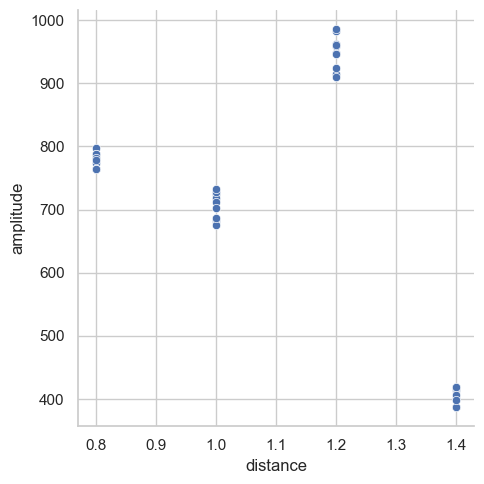

In [7]:
sns.relplot(x="distance", y="amplitude", data=df_amplitude)

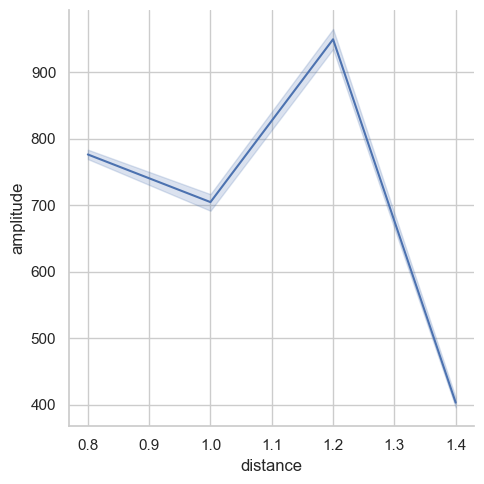

In [8]:
sns.relplot(x="distance", y="amplitude", data=df_amplitude, kind="line")

In [9]:
spectrum = []
amplitude = []
for i in range(4):
    test_signal = readwav(f"../data/agc-off-test/test{i}.wav")
    sp = []
    amp = []
    for j in range(10):
        spec, ampli = get_tukey_spectrum_amplitude(
            test_signal[j * 96000 : (j + 2) * 96000, 0],
            first_freq=15000,
            last_freq=22000,
            interval_length=0.2,
            ampli_band="all",
        )
        sp.append(spec)
        amp.append(ampli)
    spectrum.append(sp)
    amplitude.append(amp)

In [10]:
df_ampli_all = pd.DataFrame()
for ampli, dist in zip(amplitude, distance):
    df_tmp = pd.DataFrame(ampli, columns=["amplitude"])
    df_tmp["distance"] = dist
    df_ampli_all = pd.concat([df_ampli_all, df_tmp])
df_ampli_all.head()

,amplitude,distance
0,10596.636837,0.8
1,10738.660010,0.8
2,10738.660010,0.8
3,10619.977445,0.8
4,10556.010031,0.8


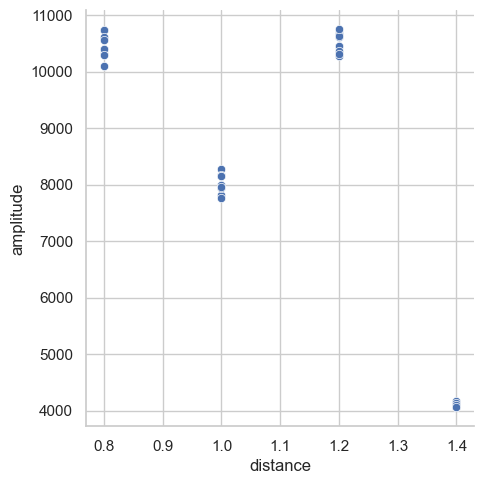

In [11]:
sns.relplot(x="distance", y="amplitude", data=df_ampli_all)

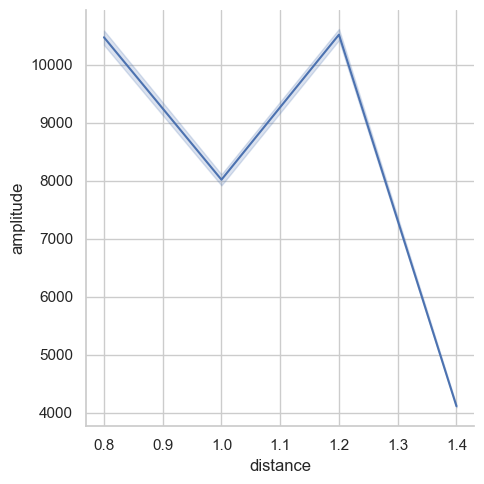

In [12]:
sns.relplot(x="distance", y="amplitude", data=df_ampli_all, kind="line")

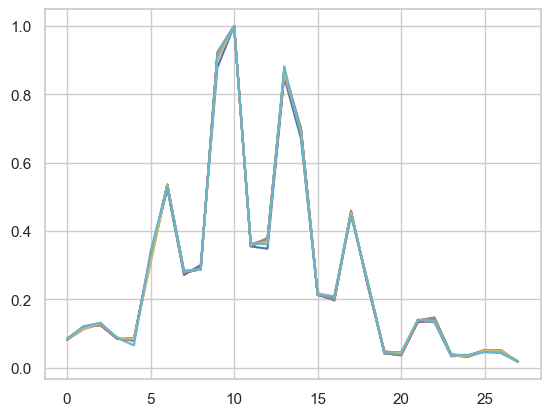

In [13]:
for i in range(10):
    plt.plot(spectrum[0][i])

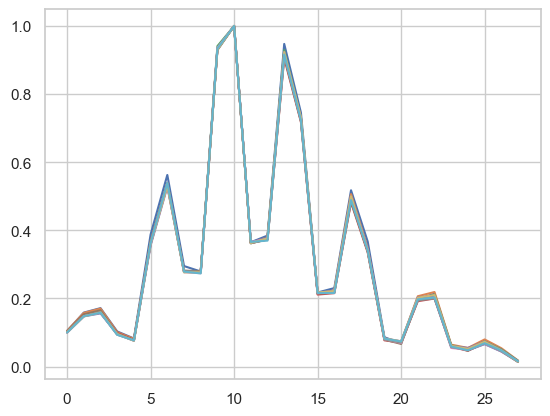

In [14]:
for i in range(10):
    plt.plot(spectrum[1][i])

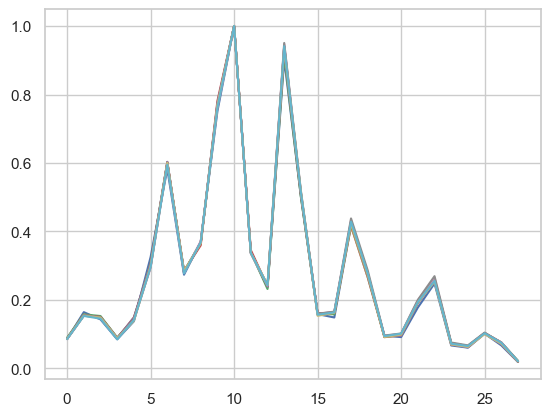

In [15]:
for i in range(10):
    plt.plot(spectrum[2][i])

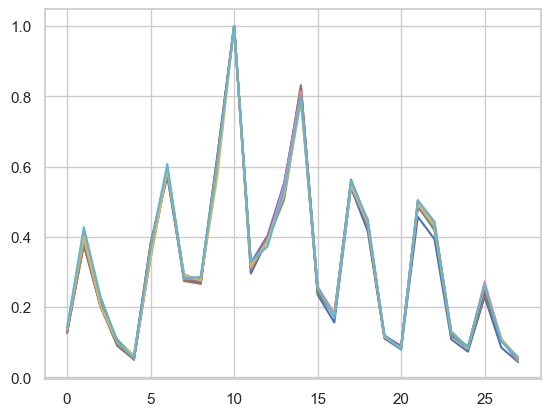

In [16]:
for i in range(10):
    plt.plot(spectrum[3][i])

In [17]:
test_signal = readwav(f"../data/agc-off-test/test0.wav")
%matplotlib qt6
plt.plot(test_signal[:, 0], alpha=0.5, label="0")
plt.plot(test_signal[:, 1], alpha=0.5, label="1")
plt.legend()